In [1]:
#Operating system
from pathlib import Path

#Data processing
import pandas as pd

#Data visulisation
import matplotlib.pyplot as plt
import seaborn as sns

#Data standardize
from sklearn import preprocessing
#Define a function to scale data between zero and one
min_max_scaler = preprocessing.MinMaxScaler()

In [2]:
#Import data
speech_df = pd.read_csv(Path.cwd() / "raw_speeches_df.txt")
topic_proportion_df = pd.read_csv(Path.cwd() / "topic_proportion_df.txt")

In [3]:
#Create index of dataframes
speech_index = []
for i in range(speech_df.shape[0]):
               index = "speech_" + str(i + 1)
               speech_index.append(index)
#Modify the index of dataframe 'speech_df'
speech_df.index = speech_index
topic_proportion_df.index = speech_index

In [4]:
#Merge dataframes 'speech_df' and 'lda_df_proportions'
merge_df = pd.merge(speech_df, topic_proportion_df, left_index = True, right_index = True)
merge_df.head()

,date,title,content,International Affairs,Insurance,American Values,Education,Military,Tax and Energy
speech_1,2010-02-01,2010_Budget_to_Congress,"Good morning, everybody. This morning, I sent...",0.000761,0.000761,0.000761,0.000763,0.000759,0.996195
speech_2,2016-09-11,911_After_15_Years,"Good morning. Scripture tells us, “Let not s...",0.001597,0.001597,0.853055,0.001601,0.140560,0.001590
speech_3,2009-09-11,911_Pentagon_Memorial_2009,"Secretary Gates, Admiral Mullen and members o...",0.002334,0.002327,0.988349,0.002328,0.002335,0.002327
speech_4,2010-09-11,911_Pentagon_Memorial_2010,"Secretary Gates, Admiral Mullen and members o...",0.001598,0.001593,0.992010,0.001598,0.001608,0.001593
speech_5,2011-03-18,Address_on_Libya,"Good afternoon, everybody.I want to take thi...",0.001154,0.001152,0.284570,0.001150,0.710824,0.001151


In [5]:
#Transform the format of date
merge_df['date']= pd.to_datetime(merge_df['date'],format= '%Y-%m-%d')

#Extract year of speeches
merge_df['year'] = merge_df['date'].dt.year.convert_dtypes()

In [6]:
#Creat a dataframe which is about the average topic proportion per year
topic_names = ['International Affairs','Insurance','American Values','Education','Military','Tax and Energy']
topic_proportion_df = merge_df.groupby('year', as_index = False)[topic_names].mean().copy()
topic_proportion_df.head()

,year,International Affairs,Insurance,American Values,Education,Military,Tax and Energy
0,2009,0.085262,0.081924,0.388002,0.065865,0.159482,0.219465
1,2010,0.051299,0.168355,0.323657,0.057339,0.142657,0.256692
2,2011,0.068022,0.051975,0.387954,0.068242,0.172326,0.251481
3,2012,0.049416,0.137305,0.387076,0.064942,0.114338,0.246924
4,2013,0.039628,0.263192,0.370160,0.082541,0.140481,0.103998


In [7]:
# transform data frame from wide to long format
topic_proportion_df_melt = topic_proportion_df.melt(id_vars = 'year', value_vars = topic_names, 
                                                        var_name = 'topic', value_name = 'proportion')
topic_proportion_df_melt.head()

,year,topic,proportion
0,2009,International Affairs,0.085262
1,2010,International Affairs,0.051299
2,2011,International Affairs,0.068022
3,2012,International Affairs,0.049416
4,2013,International Affairs,0.039628


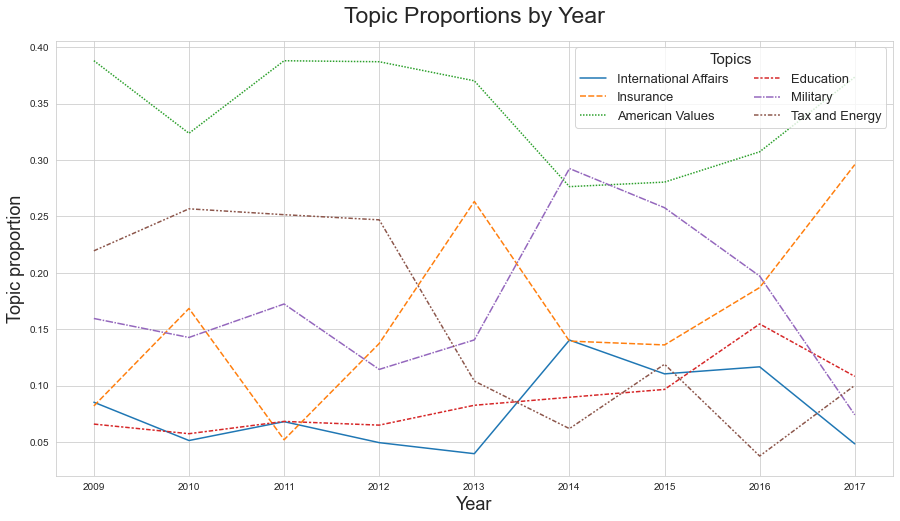

In [8]:
#Plot topic proportion by year
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 8]
topic_proportion = sns.lineplot(data = topic_proportion_df_melt, x = "year", y = "proportion", hue = "topic",style='topic')
topic_proportion.set_xlabel("Year", fontsize = 18)
topic_proportion.set_ylabel("Topic proportion", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper right', fontsize = 13, title = "Topics", title_fontsize = 15, markerscale = 1.5)
plt.title('Topic Proportions by Year', fontsize = 23, pad = 18)
plt.show()

In [9]:
#Import exteranl data
external_df = pd.read_excel(Path.cwd() / "External Variate.xlsx")

In [10]:
#Print external data for visually checking
external_df

,Year,Military Spending(Billion),Uninsured population (%),Tax Revenue (trillion),Energy Consumption(Mtone),Obama job approval rate(%)
0,2009,705.917,15.2,2.10,2164,58.75
1,2010,738.005,15.6,2.16,2217,46.75
2,2011,752.288,15.2,2.30,2191,44.67
3,2012,725.205,14.8,2.45,2152,47.50
4,2013,679.229,14.6,2.77,2191,46.42
5,2014,647.789,11.7,3.02,2217,42.42
6,2015,633.829,9.4,3.25,2193,46.33
7,2016,639.856,8.6,3.27,2169,51.67
8,2017,646.752,8.8,3.32,2162,57.00


In [11]:
#Merge dataframes 'speech_df' and 'lda_df_proportions'
new_merge_df = pd.merge(topic_proportion_df, external_df, left_index = True, right_index = True)
new_merge_df.head()

,year,International Affairs,Insurance,American Values,Education,Military,Tax and Energy,Year,Military Spending(Billion),Uninsured population (%),Tax Revenue (trillion),Energy Consumption(Mtone),Obama job approval rate(%)
0,2009,0.085262,0.081924,0.388002,0.065865,0.159482,0.219465,2009,705.917,15.2,2.10,2164,58.75
1,2010,0.051299,0.168355,0.323657,0.057339,0.142657,0.256692,2010,738.005,15.6,2.16,2217,46.75
2,2011,0.068022,0.051975,0.387954,0.068242,0.172326,0.251481,2011,752.288,15.2,2.30,2191,44.67
3,2012,0.049416,0.137305,0.387076,0.064942,0.114338,0.246924,2012,725.205,14.8,2.45,2152,47.50
4,2013,0.039628,0.263192,0.370160,0.082541,0.140481,0.103998,2013,679.229,14.6,2.77,2191,46.42


In [12]:
#Scale exteranl data
new_merge_df['Military Spending_Scaled'] = min_max_scaler.fit_transform(new_merge_df[['Military Spending(Billion)']])
new_merge_df['Uninsured proportion_Scaled'] = min_max_scaler.fit_transform(new_merge_df[['Uninsured population (%)']])
new_merge_df['Tax Revenue_Scaled'] = min_max_scaler.fit_transform(new_merge_df[['Tax Revenue (trillion)']])
new_merge_df['Energy Consumption_Scaled'] = min_max_scaler.fit_transform(new_merge_df[['Energy Consumption(Mtone)']])
new_merge_df['Approval Rate_Scaled'] = min_max_scaler.fit_transform(new_merge_df[['Obama job approval rate(%)']])
new_merge_df.drop(new_merge_df.columns[[7,8,9,10,11,12]],axis=1,inplace=True)
new_merge_df

,year,International Affairs,Insurance,American Values,Education,Military,Tax and Energy,Military Spending_Scaled,Uninsured proportion_Scaled,Tax Revenue_Scaled,Energy Consumption_Scaled,Approval Rate_Scaled
0,2009,0.085262,0.081924,0.388002,0.065865,0.159482,0.219465,0.608548,0.942857,0.000000,0.184615,1.000000
1,2010,0.051299,0.168355,0.323657,0.057339,0.142657,0.256692,0.879427,1.000000,0.049180,1.000000,0.265156
2,2011,0.068022,0.051975,0.387954,0.068242,0.172326,0.251481,1.000000,0.942857,0.163934,0.600000,0.137783
3,2012,0.049416,0.137305,0.387076,0.064942,0.114338,0.246924,0.771372,0.885714,0.286885,0.000000,0.311084
4,2013,0.039628,0.263192,0.370160,0.082541,0.140481,0.103998,0.383255,0.857143,0.549180,0.600000,0.244948
5,2014,0.140339,0.139415,0.276350,0.089642,0.292414,0.061839,0.117847,0.442857,0.754098,1.000000,0.000000
6,2015,0.110384,0.136044,0.280371,0.096594,0.257674,0.118932,0.000000,0.114286,0.942623,0.630769,0.239437
7,2016,0.116626,0.186899,0.307233,0.154631,0.197065,0.037546,0.050878,0.000000,0.959016,0.261538,0.566442
8,2017,0.048347,0.295873,0.373414,0.108166,0.074053,0.100148,0.109093,0.028571,1.000000,0.153846,0.892835


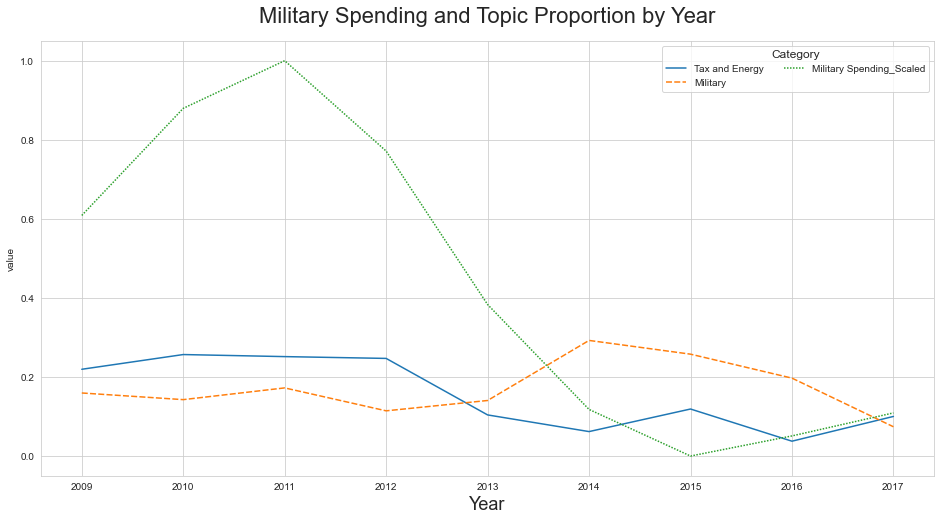

In [13]:
#Create the dataframe for plotting Military Spending
plot1_df = new_merge_df[['year','Tax and Energy','Military','Military Spending_Scaled']]
plot1_df = plot1_df.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#Plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
plot1 = sns.lineplot(data = plot1_df, x = "year", y = "value", hue = "category",style="category")
plot1.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper right', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Military Spending and Topic Proportion by Year', fontsize = 22, pad = 18)
plt.show()

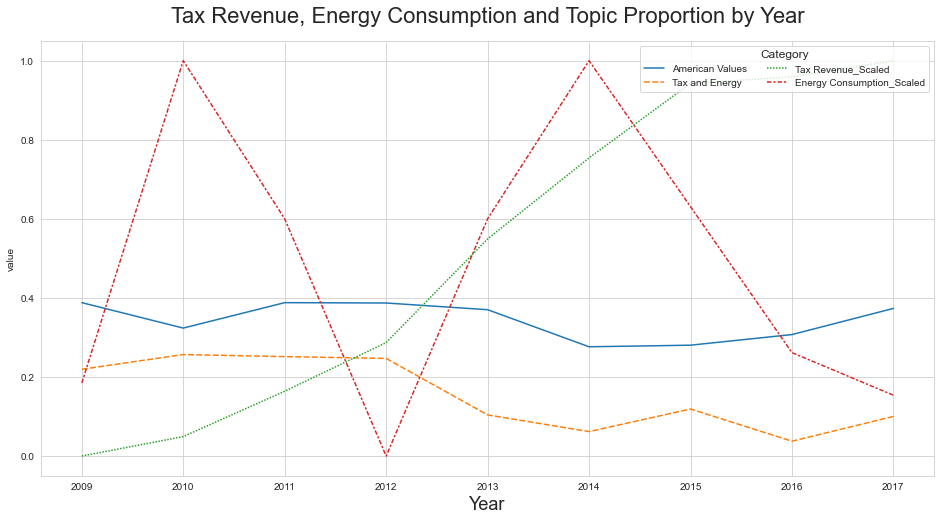

In [14]:
#Create the dataframe for plotting Tax Revenue and Energy Consumption
plot2_df = new_merge_df[['year','American Values','Tax and Energy','Tax Revenue_Scaled','Energy Consumption_Scaled']]
plot2_df = plot2_df.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#Plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
plot2 = sns.lineplot(data = plot2_df, x = "year", y = "value", hue = "category",style="category")
plot2.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper right', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Tax Revenue, Energy Consumption and Topic Proportion by Year', fontsize = 22, pad = 18)
plt.show()

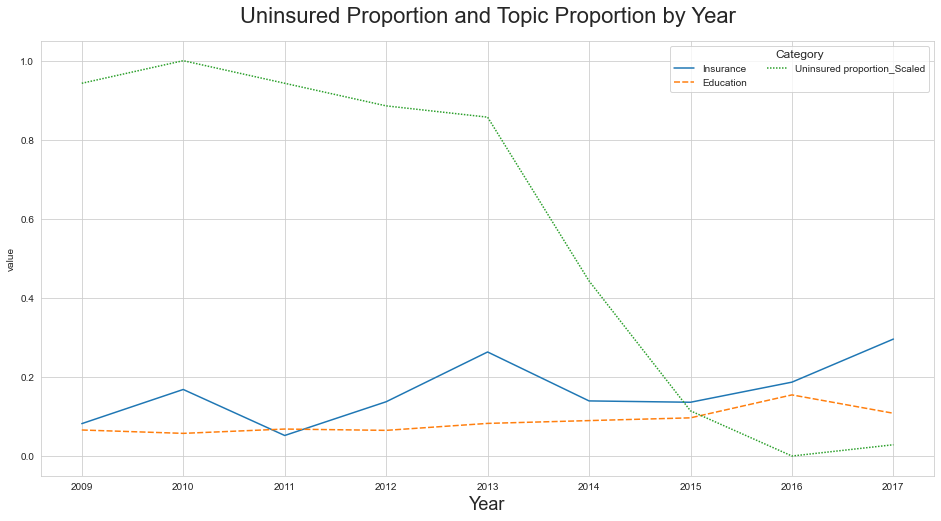

In [15]:
#Create the dataframe for plotting Uninsured proportion_Scaled
plot3_df = new_merge_df[['year','Insurance','Education','Uninsured proportion_Scaled']]
plot3_df = plot3_df.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#Plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
plot3 = sns.lineplot(data = plot3_df, x = "year", y = "value", hue = "category",style="category")
plot3.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper right', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Uninsured Proportion and Topic Proportion by Year', fontsize = 22, pad = 18)
plt.show()

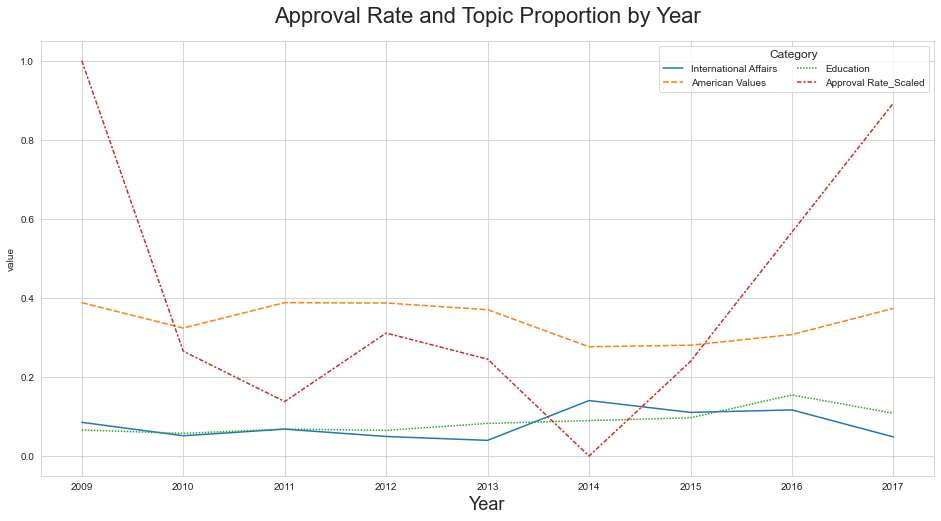

In [16]:
#Create the dataframe for plotting Approval Rate
plot4_df = new_merge_df[['year','International Affairs','American Values','Education','Approval Rate_Scaled']]
plot4_df = plot4_df.melt(id_vars = 'year', var_name = 'category', value_name = 'value')

#Plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [16, 8]
plot4 = sns.lineplot(data = plot4_df, x = "year", y = "value", hue = "category",style="category")
plot4.set_xlabel("Year", fontsize = 18)
plt.legend(ncol = 2, loc = 'upper right', fontsize = 10, title = "Category", title_fontsize = 12, markerscale = 1.2)
plt.title('Approval Rate and Topic Proportion by Year', fontsize = 22, pad = 18)
plt.show()